---

### 📜 Licence d'utilisation

Ce document est protégé sous licence **Creative Commons BY-NC-ND 4.0 International**  
🔒 **Aucune modification ni réutilisation sans autorisation explicite de l'auteur.**

- 👤 Auteur : Christie Vassilian  
- 📥 Téléchargement autorisé uniquement à usage pédagogique personnel  
- 🚫 Réutilisation commerciale ou modification interdite  

[![Licence CC BY-NC-ND](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/)

---

# SNT — Photographie numérique futuriste  
## OpenCV, filtres & YOLO (Ultralytics)

Ce notebook sert de **fil conducteur** pour le chapitre *Photographie numérique* en SNT.

Il s'appuie sur trois notebooks déjà prêts :

- `Filtre_partie_1.ipynb` : filtres OpenCV sur des **photos**  
- `Filtre_partie_2.ipynb` : utilisation de la **webcam** avec une mosaïque de filtres  
- `Filtre_partie_3.ipynb` : pilotage des filtres avec la **main** (MediaPipe + OpenCV)

Dans ce document, on ajoute :

1. une première partie **exploration de l'image** avec OpenCV (couleur + niveaux de gris + canaux RVB) ;
2. une articulation claire avec les trois notebooks de filtres ;
3. une dernière partie **YOLO (Ultralytics)** pour la détection d'objets sur une photo.


---
## 0) Vérifier les fichiers nécessaires

Les fichiers suivants doivent se trouver **dans le même dossier** que ce notebook :

- `Filtre_partie_1.ipynb`
- `Filtre_partie_2.ipynb`
- `Filtre_partie_3.ipynb`
- une image de travail, par exemple `sample.jpg`

Exécute la cellule ci-dessous pour vérifier leur présence.

In [2]:
from pathlib import Path

files = [
    'Filtre_partie_1.ipynb',
    'Filtre_partie_2.ipynb',
    'Filtre_partie_3.ipynb',
    'sample_1.jpg',
]

for name in files:
    p = Path(name)
    print(f"{name} : {'OK' if p.exists() else 'MANQUANT'}")

Filtre_partie_1.ipynb : OK
Filtre_partie_2.ipynb : OK
Filtre_partie_3.ipynb : OK
sample_1.jpg : MANQUANT


---
## 1) Ouvrir une image en couleur et en niveaux de gris

Objectifs :

- charger une image avec **OpenCV** ;
- l'afficher en **couleur** ;
- l'afficher en **noir et blanc** (niveaux de gris).


Taille de l'image couleur (H, W, C) : (1024, 1024, 3)
Taille de l'image en niveaux de gris (H, W) : (1024, 1024)


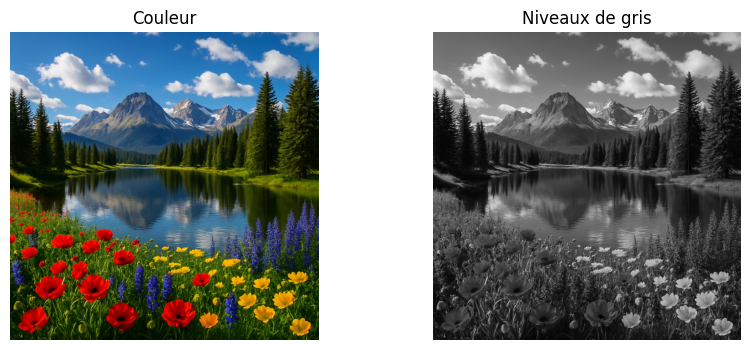

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def imshow(img, title="Image", cmap=None):
    plt.figure(figsize=(5,5))
    if cmap is None:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Chargement de l'image de travail
path_img = Path('sample_1.png')
if not path_img.exists():
    raise FileNotFoundError("Image de travail introuvable : place un fichier 'sample.jpg' dans le même dossier.")

# OpenCV charge en BGR : on convertit en RGB pour matplotlib
img_bgr = cv2.imread(str(path_img))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Conversion en niveaux de gris
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

print("Taille de l'image couleur (H, W, C) :", img_rgb.shape)
print("Taille de l'image en niveaux de gris (H, W) :", img_gray.shape)

# Affichage des deux versions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title('Couleur'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img_gray, cmap='gray'); plt.title('Niveaux de gris'); plt.axis('off')
plt.show()

**Questions**

1. Quelle est la différence entre la forme du tableau couleur `(H, W, C)` et celle du tableau en niveaux de gris `(H, W)` ?  
2. Donne un exemple de situation où il peut être intéressant de travailler en niveaux de gris plutôt qu'en couleur.

---
## 2) Canaux Rouge, Vert, Bleu (RVB)

On garde ici l'image couleur et on regarde séparément les trois canaux **Rouge**, **Vert** et **Bleu**.


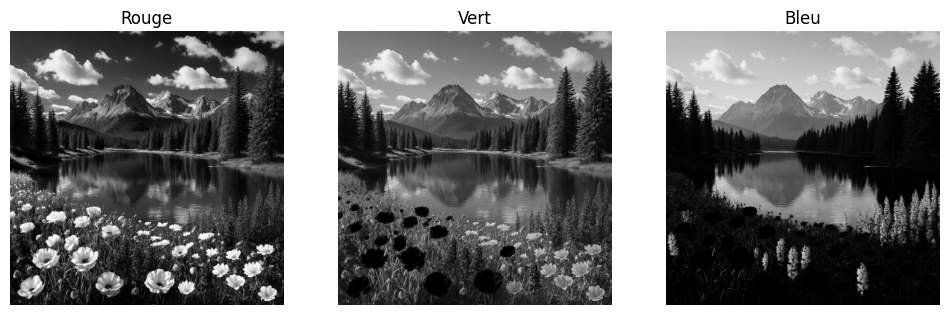

In [6]:
# Séparation des canaux Rouge / Vert / Bleu
R, G, B = cv2.split(img_rgb)

plt.figure(figsize=(12,4))
for i, (channel, name) in enumerate(zip([R, G, B], ['Rouge', 'Vert', 'Bleu'])):
    plt.subplot(1,3,i+1)
    plt.imshow(channel, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.show()

**Questions**

1. Que représentent les trois nombres `(H, W, C)` affichés pour l'image couleur ?  
2. Explique pourquoi certaines zones apparaissent très claires sur le canal **Rouge** ou **Bleu** (par exemple le visage, la veste, la bouteille…).

---
## 3) Ouvrir une image et appliquer des filtres (Notebooks 1 et 2)

Dans cette partie, on ne rajoute pas de nouveau code ici : on va utiliser les deux premiers notebooks de la série.

- `Filtre_partie_1.ipynb` : **ouvrir une image** et appliquer différents **filtres OpenCV** sur des photos.  
- `Filtre_partie_2.ipynb` : appliquer des filtres en temps réel sur la **webcam**.

### Consigne

1. Ouvre `Filtre_partie_1.ipynb` et suis les instructions pour tester plusieurs filtres (niveaux de gris, négatif, flous, contours, etc.).  
2. Ouvre ensuite `Filtre_partie_2.ipynb` pour appliquer les filtres sur la webcam (mosaïque de filtres en direct).  

**Questions au fil de l'activité**

- Quels sont les filtres que tu trouves les plus utiles / esthétiques sur une **photo fixe** ?  
- Certains filtres sont-ils plus lourds à calculer en **temps réel** sur la webcam ? Lesquels et pourquoi, à ton avis ?

---
## 4) Projet d'application MediaPipe — Notebook 3

Le troisième notebook combine **OpenCV** avec **MediaPipe** pour détecter la **main** et piloter les filtres.
C'est une base pour imaginer une petite application interactive de type filtre "intelligent".

### Consigne de projet

1. Ouvre `Filtre_partie_3.ipynb`.  
2. Exécute les cellules pour tester le pilotage des filtres avec la main / les doigts.  
3. Observe comment MediaPipe est utilisé pour détecter la position de la main.

### Pistes de prolongement (à choisir selon le temps disponible)

- Modifier les **règles de changement de filtre** (par exemple, en fonction du nombre de doigts visibles).  
- Changer le **filtre appliqué** (en réutilisant certains filtres de `Filtre_partie_1.ipynb`).  
- Imaginer une mini-démo : *"tourner la main" déclenche un type de filtre, *"fermer la main" en déclenche un autre, etc.

**Question centrale**

> En quoi MediaPipe permet-il ici de rapprocher ton programme des applications réalisant des filtres IA sur smartphone ?

---
## 5) Détection d'objets avec YOLO (Ultralytics)

Pour terminer, on applique un modèle de **deep learning** prêt à l'emploi : **YOLO** (You Only Look Once).
Ce modèle est capable de **détecter plusieurs objets** dans une image en une seule passe.

Ici, on utilise la bibliothèque **Ultralytics**.
Selon la version installée, le nom du modèle peut être `yolo11n.pt` ou `yolov8n.pt` (par exemple).


In [ ]:
# Installation (à faire une seule fois dans l'environnement)
# Décommente la ligne ci-dessous si la librairie n'est pas encore installée.
# !pip install ultralytics



image 1/1 c:\Users\vassi\Desktop\activit filtre FUN CLUB IA\sample_3.png: 448x640 5 persons, 7 cars, 1 stop sign, 76.5ms
Speed: 2.8ms preprocess, 76.5ms inference, 6.3ms postprocess per image at shape (1, 3, 448, 640)


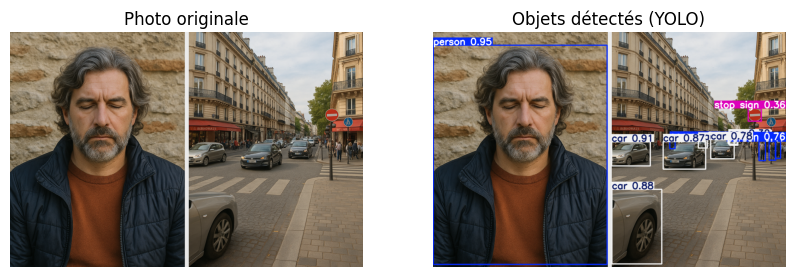

Classes d'objets détectées (indices) : tensor([ 0.,  2.,  2.,  2.,  2.,  0.,  0.,  2., 11.,  0.,  2.,  2.,  0.])
Confiances associées : tensor([0.9530, 0.9089, 0.8784, 0.8654, 0.7832, 0.7634, 0.4703, 0.4163, 0.3637, 0.3632, 0.3238, 0.3117, 0.2579])


In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# On réutilise la même image de travail
path_img = Path('sample_3.png')
if not path_img.exists():
    raise FileNotFoundError("Image de travail introuvable : place un fichier 'sample.jpg' dans le même dossier.")

# Chargement d'un modèle pré-entraîné
try:
    model = YOLO('yolo11n.pt')  # essayer d'abord ce modèle
except Exception as e:
    print("Problème avec 'yolo11n.pt' -> on essaie 'yolov8n.pt'")
    model = YOLO('yolov8n.pt')

# Inférence sur l'image
results = model(source=str(path_img), imgsz=640)

# Image annotée (BGR -> RGB)
annotated_bgr = results[0].plot()
annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

img_bgr = cv2.imread(str(path_img))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title('Photo originale'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(annotated_rgb); plt.title('Objets détectés (YOLO)'); plt.axis('off')
plt.show()

print("Classes d'objets détectées (indices) :", results[0].boxes.cls)
print("Confiances associées :", results[0].boxes.conf)

**Questions**

- Quels objets YOLO détecte-t-il sur la photo ? Certains manquent-ils ?  
- Observe les scores de **confiance** : que signifient-ils ?  
- Donne un exemple d'utilisation positive de ce type d'algorithme (sécurité, aide à la conduite, tri automatique de photos) et un risque potentiel (surveillance, atteinte à la vie privée, biais).

---

### 📜 Licence d'utilisation

Ce document est protégé sous licence **Creative Commons BY-NC-ND 4.0 International**  
🔒 **Aucune modification ni réutilisation sans autorisation explicite de l'auteur.**

- 👤 Auteur : Christie Vassilian  
- 📥 Téléchargement autorisé uniquement à usage pédagogique personnel  
- 🚫 Réutilisation commerciale ou modification interdite  

[![Licence CC BY-NC-ND](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/)

---